## Plot the data

/tmp/ipykernel_1345236/1124105737.py:32: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  weather_df = pd.read_csv(


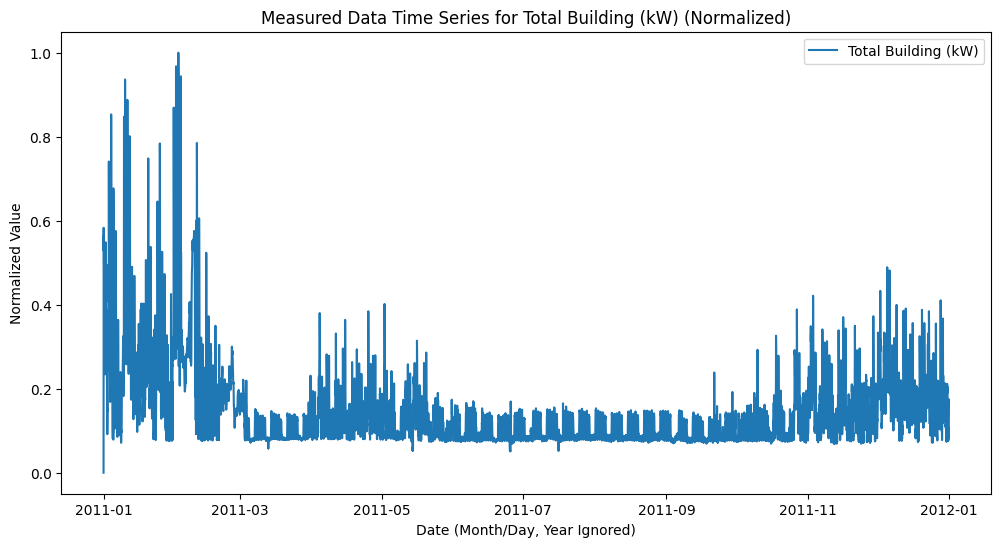

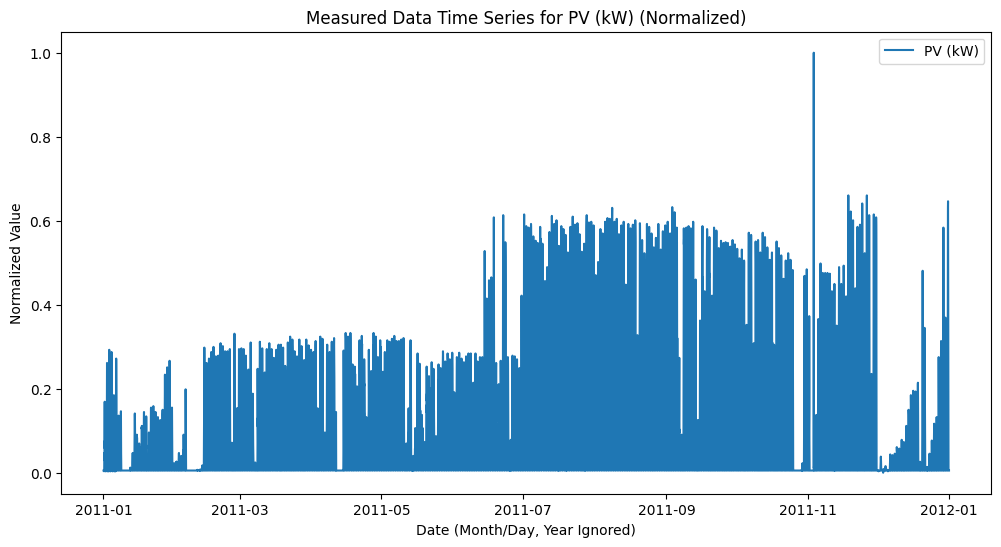

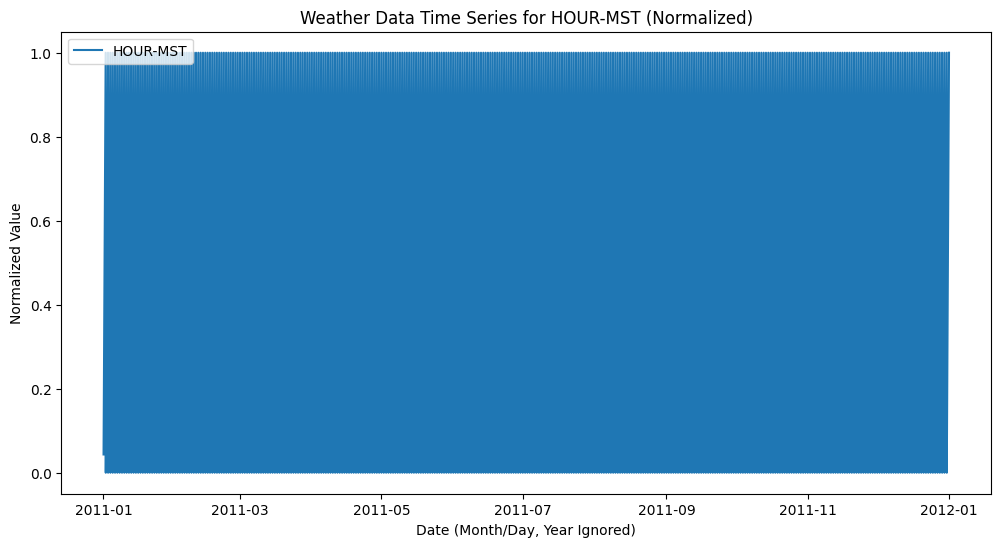

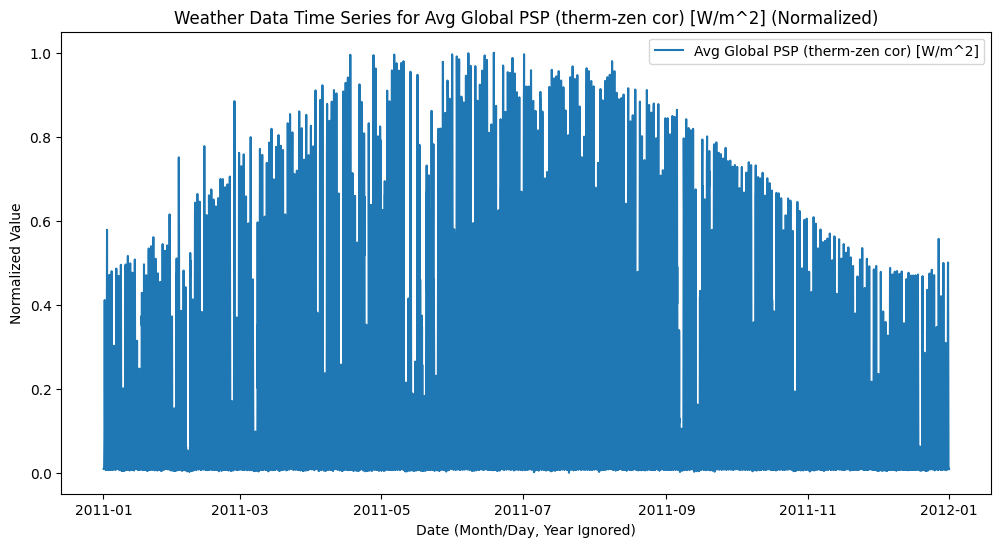

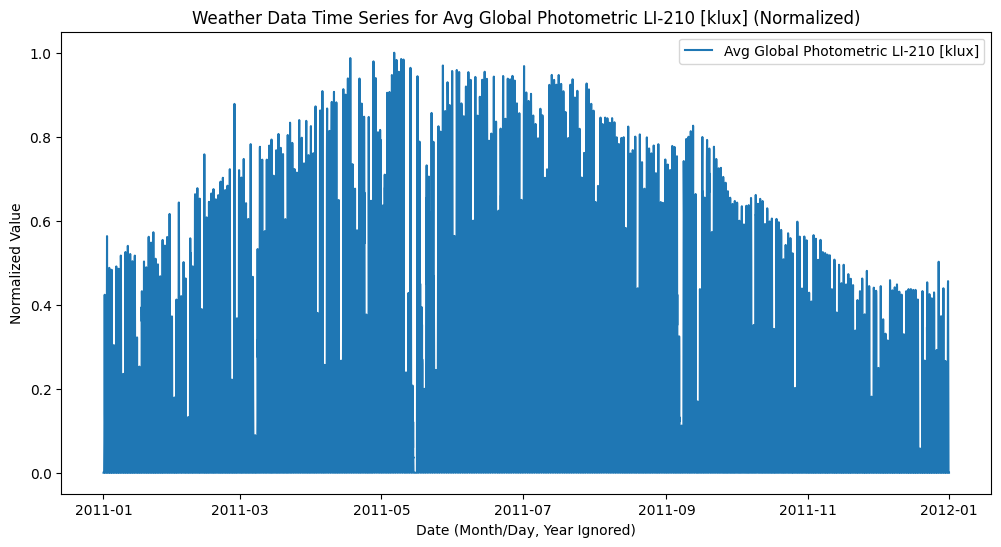

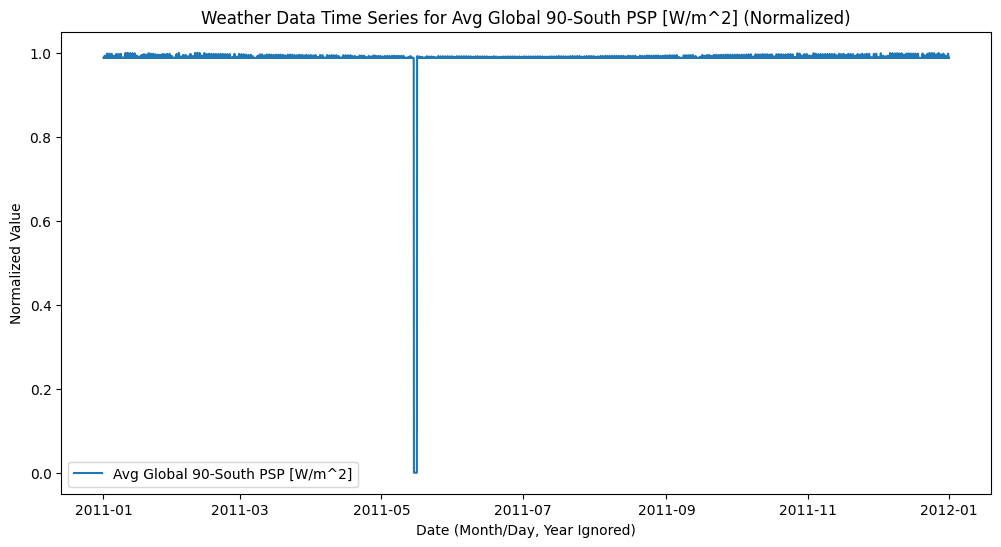

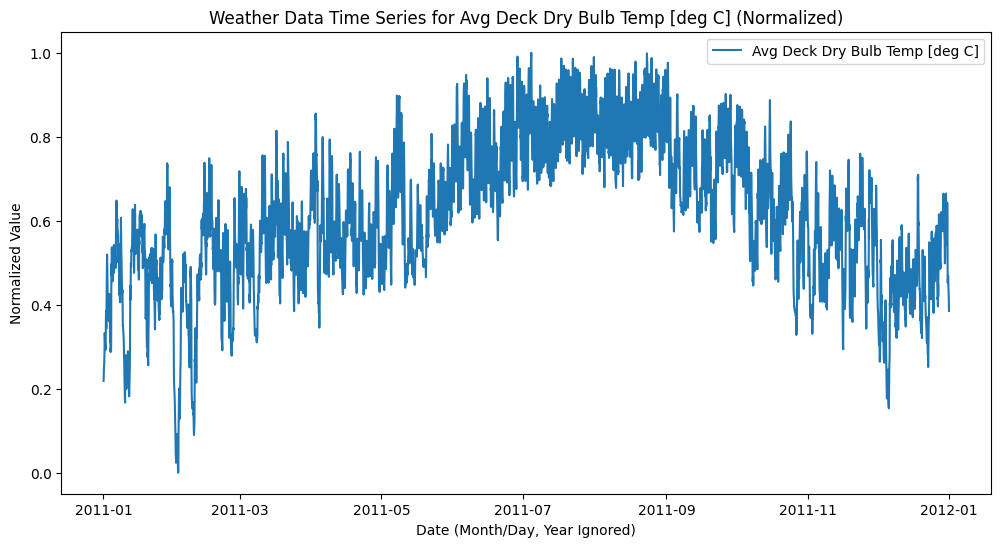

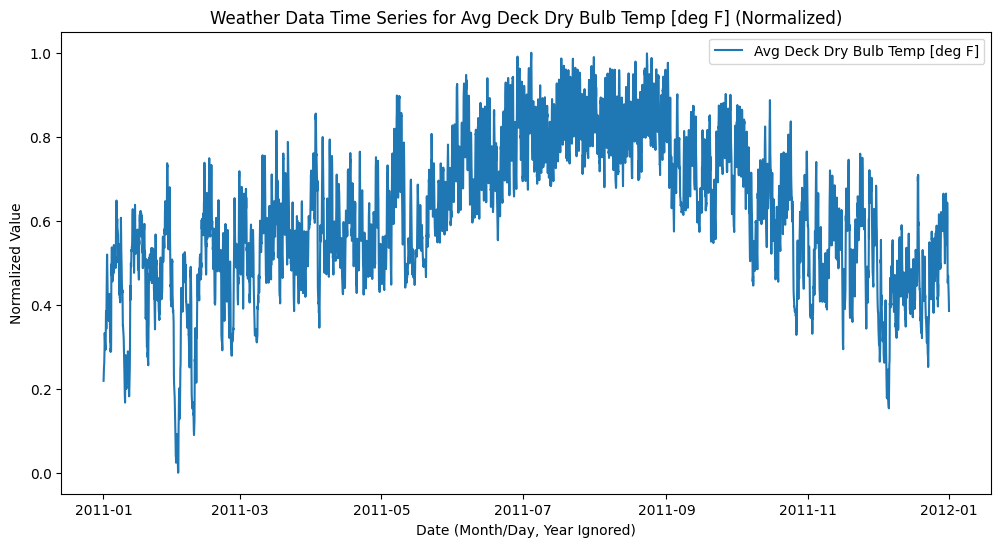

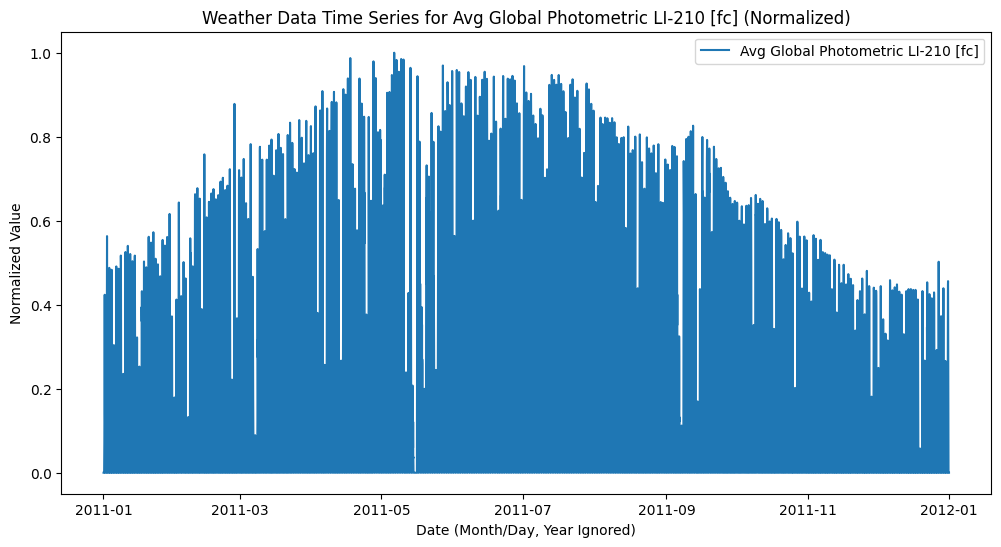

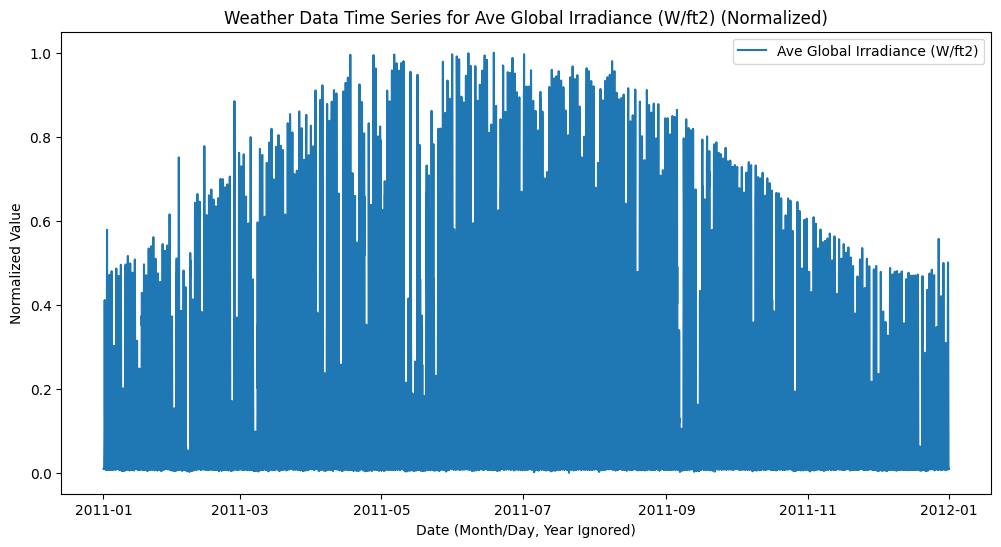

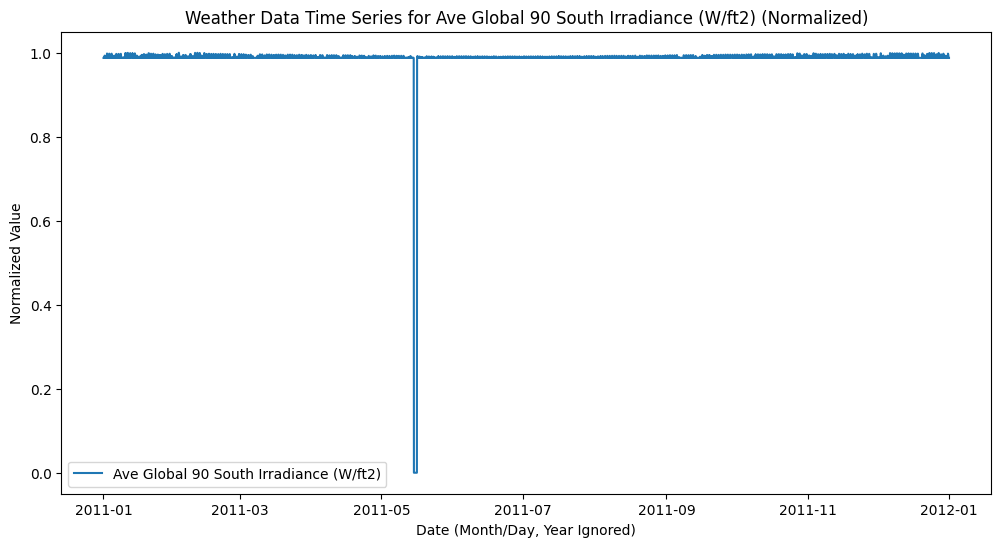

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_measured_date(date_str):
    """
    Try to parse a date string using two possible formats.
    Returns NaT if neither format works.
    """
    for fmt in ("%m/%d/%Y %H:%M", "%m/%d/%y %H:%M"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except Exception:
            continue
    return pd.NaT

# ------------------------------
# Process Measured Data
# ------------------------------
measured_df = pd.read_csv("rsfmeasureddata2011.csv")
# Apply the custom date parser.
measured_df["Date and Time"] = measured_df["Date and Time"].apply(parse_measured_date)
# Drop rows with unparseable dates.
measured_df = measured_df.dropna(subset=["Date and Time"])
# Replace the year with a constant (e.g., 2011) to ignore the year.
measured_df["Date and Time"] = measured_df["Date and Time"].apply(lambda dt: dt.replace(year=2011))
# Set the new datetime as index.
measured_df.set_index("Date and Time", inplace=True)

# ------------------------------
# Process Weather Data
# ------------------------------
weather_df = pd.read_csv(
    "rsfweatherdata2011.csv",
    parse_dates=["DATE AND TIME"],
    date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%y %H:%M", errors='coerce')
)
weather_df = weather_df.dropna(subset=["DATE AND TIME"])
weather_df["DATE AND TIME"] = weather_df["DATE AND TIME"].apply(lambda dt: dt.replace(year=2011))
weather_df.set_index("DATE AND TIME", inplace=True)

# ------------------------------
# Normalization
# ------------------------------
# Normalize measured_df (for the columns you are interested in plotting)
measured_df_norm = measured_df.copy()

# Flip sign for the "PV (kW)" column since its values are negative.
if "PV (kW)" in measured_df_norm.columns:
    measured_df_norm["PV (kW)"] = -measured_df_norm["PV (kW)"]

cols_to_normalize = ["Total Building (kW)", "PV (kW)"]
measured_df_norm[cols_to_normalize] = (measured_df_norm[cols_to_normalize] - measured_df_norm[cols_to_normalize].min()) / \
                                       (measured_df_norm[cols_to_normalize].max() - measured_df_norm[cols_to_normalize].min())

# For weather data, convert all columns to numeric and drop columns that are entirely non-numeric.
numeric_weather_df = weather_df.apply(pd.to_numeric, errors='coerce')
numeric_weather_df = numeric_weather_df.dropna(axis=1, how='all')
# Normalize all numeric columns.
numeric_weather_df_norm = (numeric_weather_df - numeric_weather_df.min()) / (numeric_weather_df.max() - numeric_weather_df.min())

# ------------------------------
# Plotting Measured Data (Separate Graphs)
# ------------------------------
for col in cols_to_normalize:
    plt.figure(figsize=(12, 6))
    plt.plot(measured_df_norm.index, measured_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Measured Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()

# ------------------------------
# Plotting Weather Data (Separate Graphs)
# ------------------------------
for col in numeric_weather_df_norm.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(numeric_weather_df_norm.index, numeric_weather_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Weather Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()


## Inverting the negative value data

/tmp/ipykernel_1345236/745763546.py:32: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  weather_df = pd.read_csv(


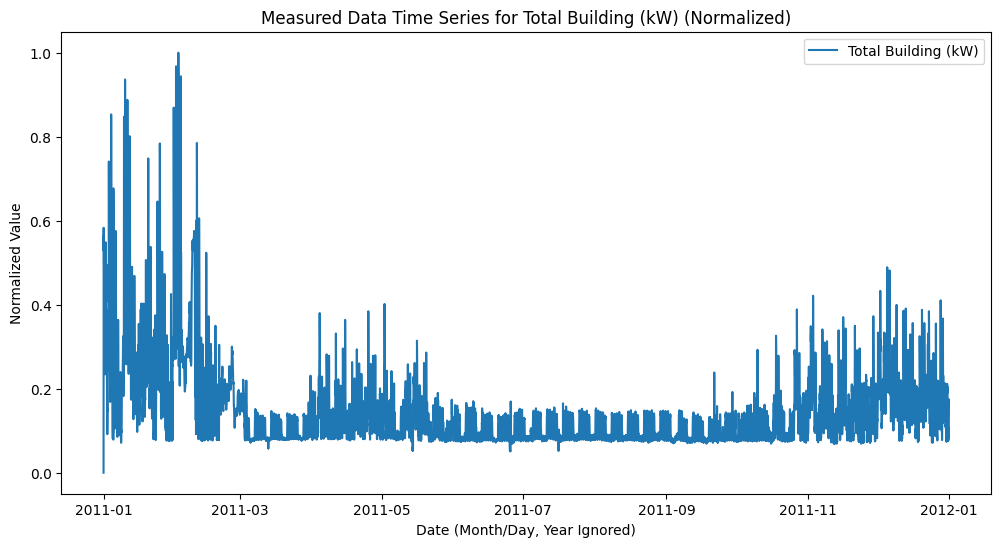

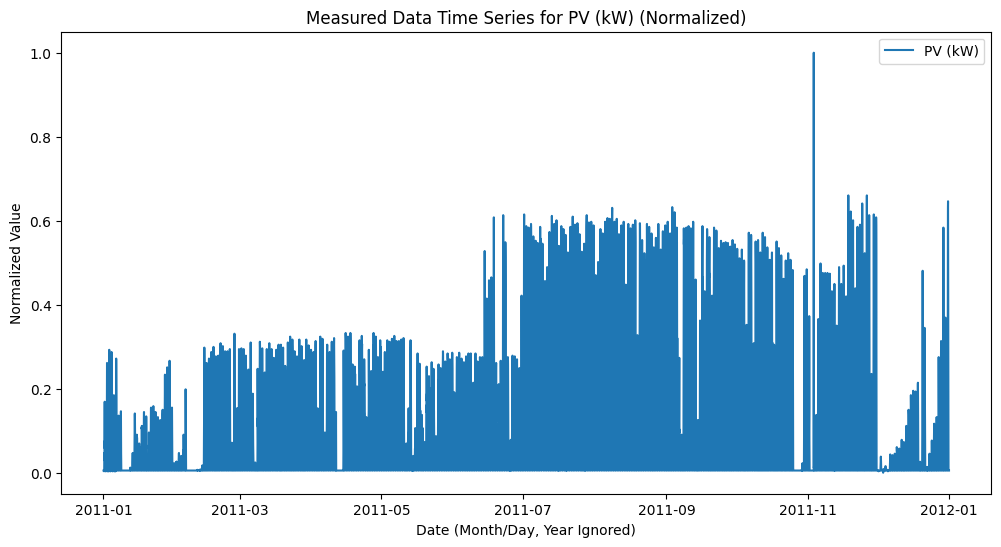

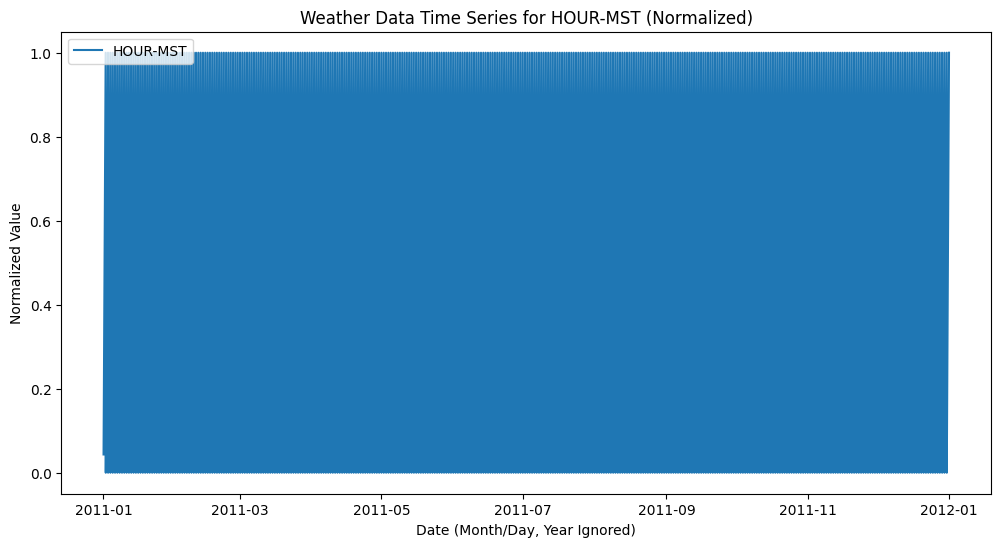

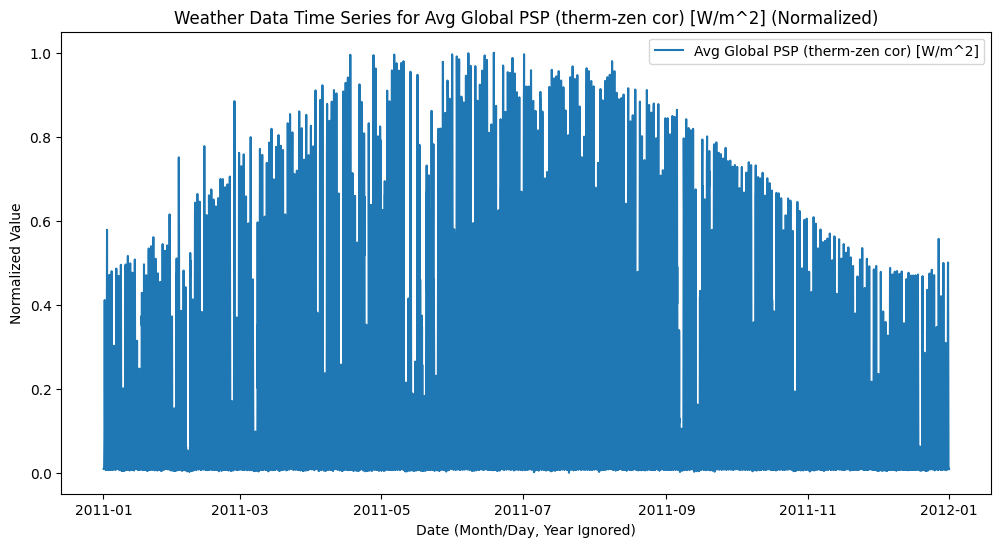

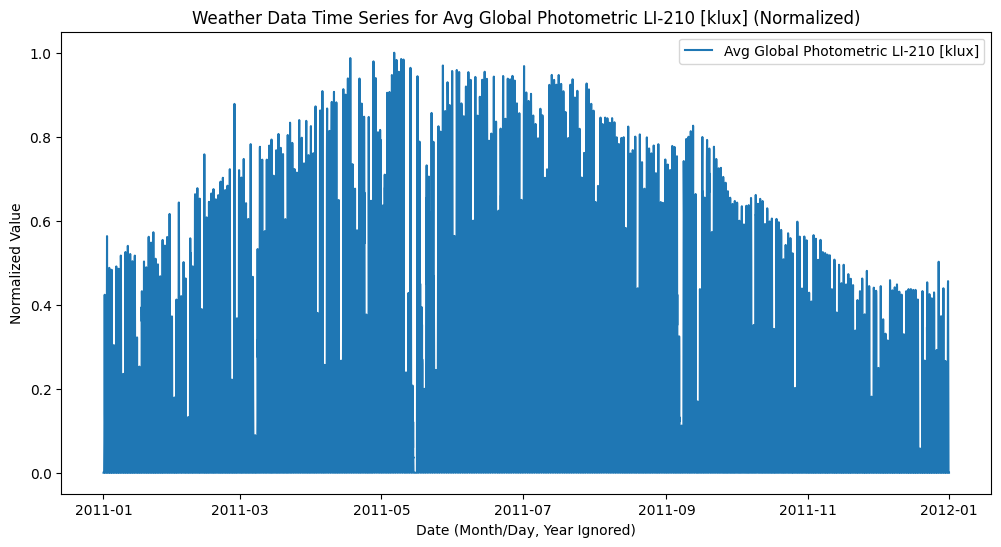

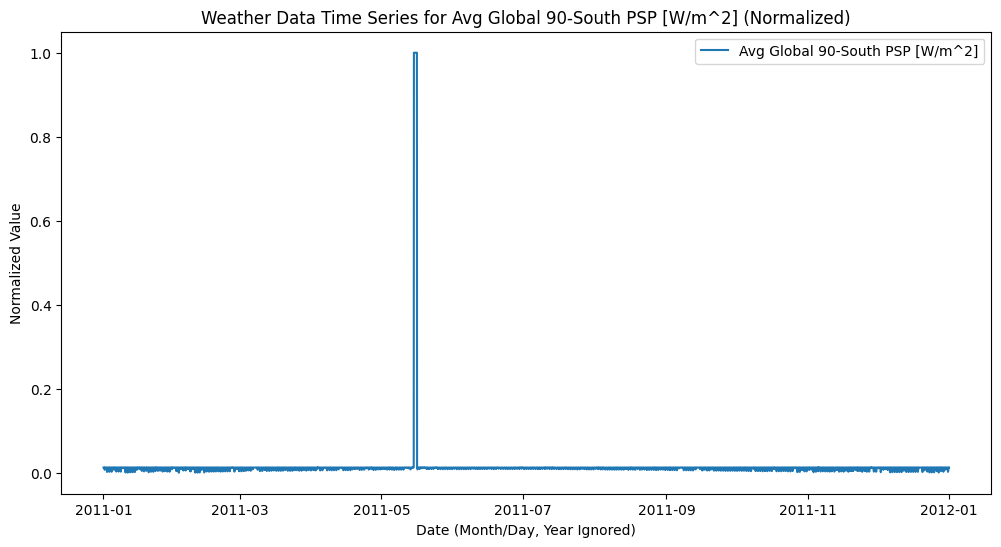

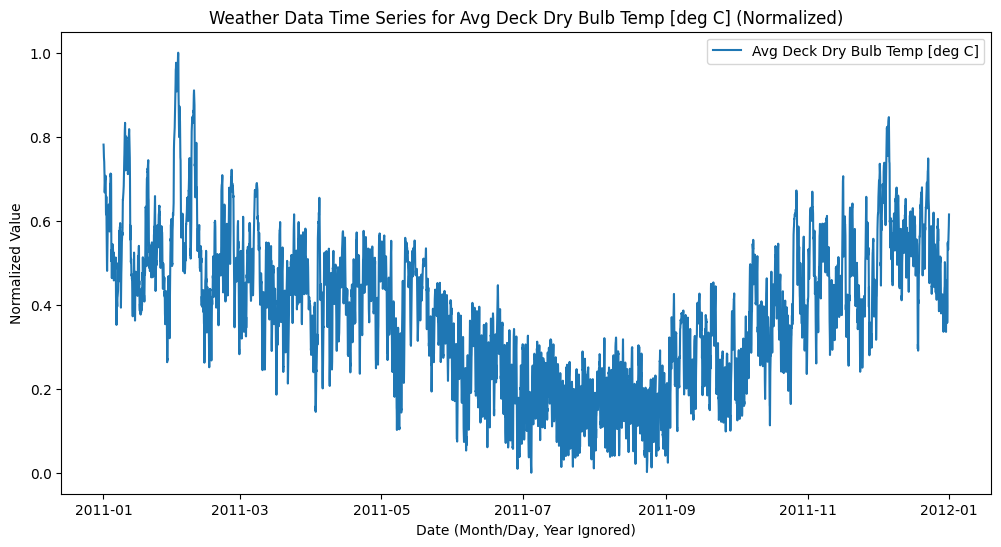

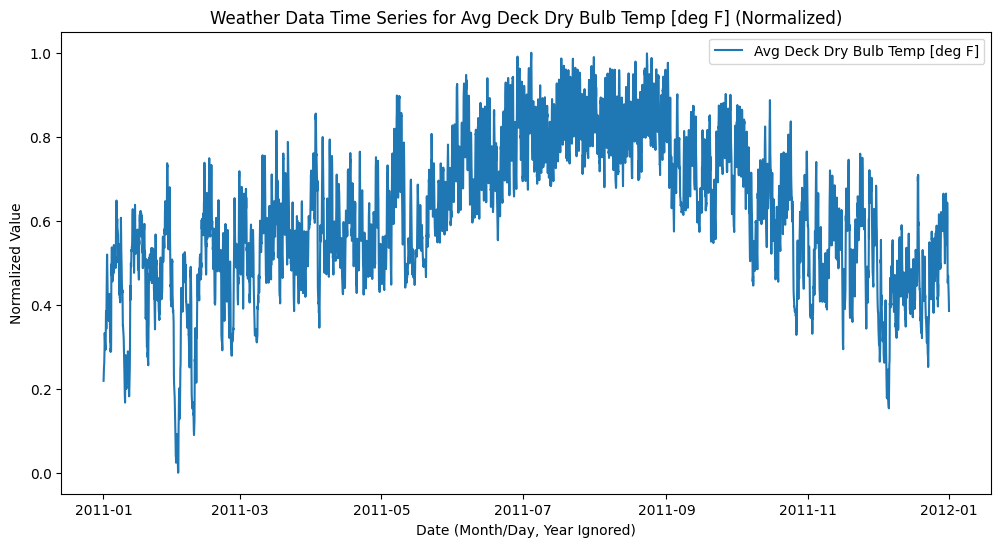

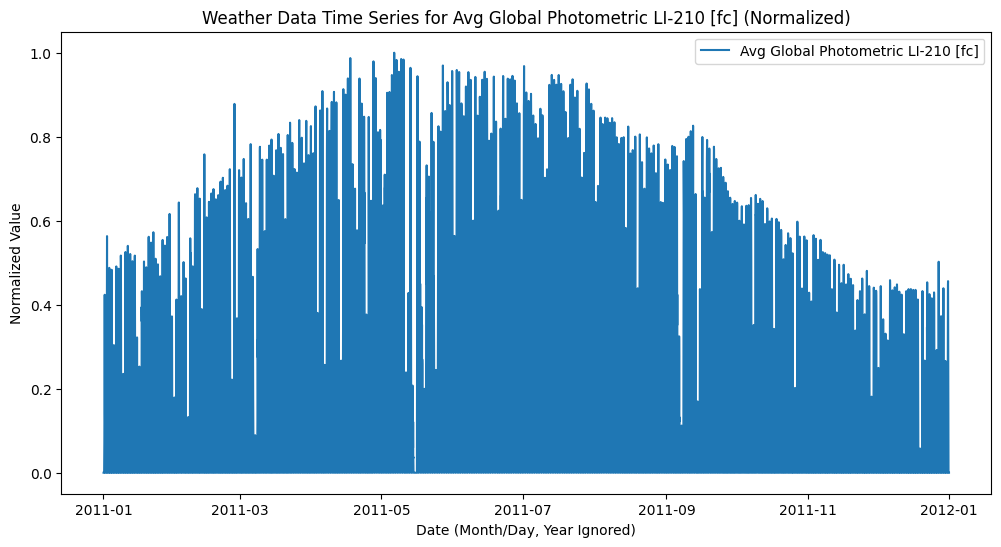

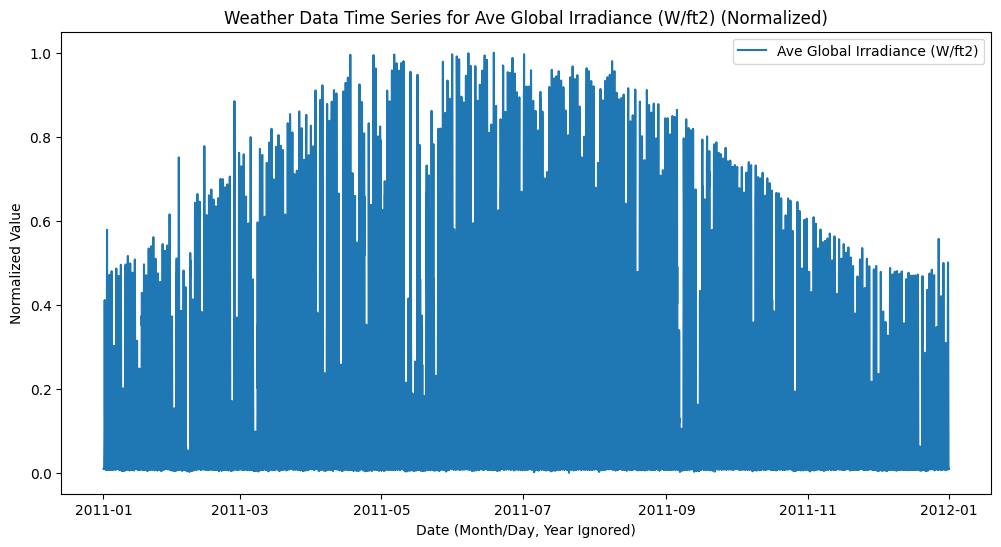

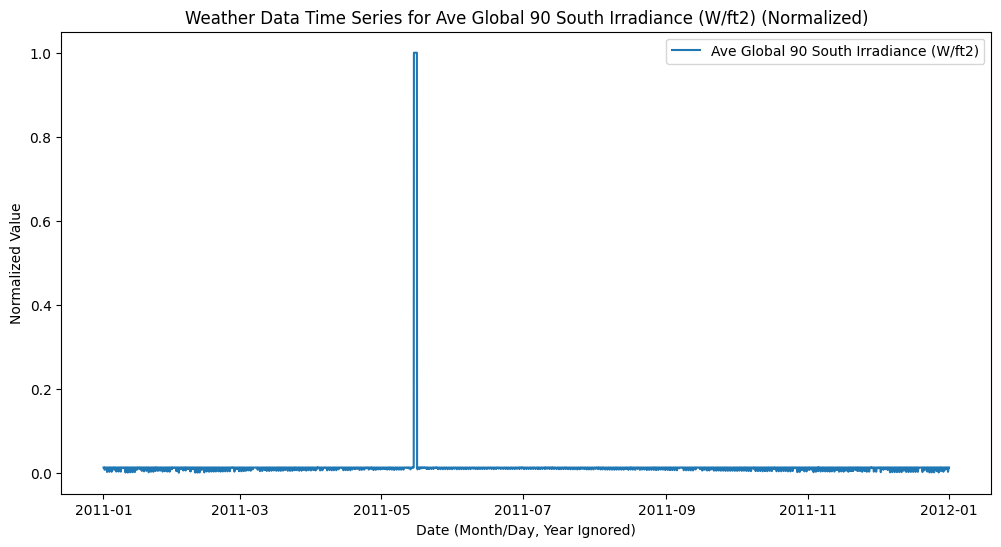

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_measured_date(date_str):
    """
    Try to parse a date string using two possible formats.
    Returns NaT if neither format works.
    """
    for fmt in ("%m/%d/%Y %H:%M", "%m/%d/%y %H:%M"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except Exception:
            continue
    return pd.NaT

# ------------------------------
# Process Measured Data
# ------------------------------
measured_df = pd.read_csv("rsfmeasureddata2011.csv")
# Apply the custom date parser.
measured_df["Date and Time"] = measured_df["Date and Time"].apply(parse_measured_date)
# Drop rows with unparseable dates.
measured_df = measured_df.dropna(subset=["Date and Time"])
# Replace the year with a constant (e.g., 2011) to ignore the year.
measured_df["Date and Time"] = measured_df["Date and Time"].apply(lambda dt: dt.replace(year=2011))
# Set the new datetime as index.
measured_df.set_index("Date and Time", inplace=True)

# ------------------------------
# Process Weather Data
# ------------------------------
weather_df = pd.read_csv(
    "rsfweatherdata2011.csv",
    parse_dates=["DATE AND TIME"],
    date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%y %H:%M", errors='coerce')
)
weather_df = weather_df.dropna(subset=["DATE AND TIME"])
weather_df["DATE AND TIME"] = weather_df["DATE AND TIME"].apply(lambda dt: dt.replace(year=2011))
weather_df.set_index("DATE AND TIME", inplace=True)

# ------------------------------
# Normalization for Measured Data
# ------------------------------
measured_df_norm = measured_df.copy()
# Flip sign for the "PV (kW)" column since its values are negative.
if "PV (kW)" in measured_df_norm.columns:
    measured_df_norm["PV (kW)"] = -measured_df_norm["PV (kW)"]

cols_to_normalize = ["Total Building (kW)", "PV (kW)"]
measured_df_norm[cols_to_normalize] = (measured_df_norm[cols_to_normalize] - measured_df_norm[cols_to_normalize].min()) / \
                                       (measured_df_norm[cols_to_normalize].max() - measured_df_norm[cols_to_normalize].min())

# ------------------------------
# Normalization for Weather Data
# ------------------------------
# Convert all columns to numeric and drop columns that are entirely non-numeric.
numeric_weather_df = weather_df.apply(pd.to_numeric, errors='coerce')
numeric_weather_df = numeric_weather_df.dropna(axis=1, how='all')

# Flip the sign of specified weather columns before normalization.
columns_to_flip = [
    "Avg Global 90-South PSP [W/m^2]",
    "Avg Deck Dry Bulb Temp [deg C]",
    "Ave Global 90 South Irradiance (W/ft2)"
]
for col in columns_to_flip:
    if col in numeric_weather_df.columns:
        numeric_weather_df[col] = -numeric_weather_df[col]

# Normalize all numeric columns.
numeric_weather_df_norm = (numeric_weather_df - numeric_weather_df.min()) / (numeric_weather_df.max() - numeric_weather_df.min())

# ------------------------------
# Plotting Measured Data (Separate Graphs)
# ------------------------------
for col in cols_to_normalize:
    plt.figure(figsize=(12, 6))
    plt.plot(measured_df_norm.index, measured_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Measured Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()

# ------------------------------
# Plotting Weather Data (Separate Graphs)
# ------------------------------
for col in numeric_weather_df_norm.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(numeric_weather_df_norm.index, numeric_weather_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Weather Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()


## Finding extreme data in the dataset

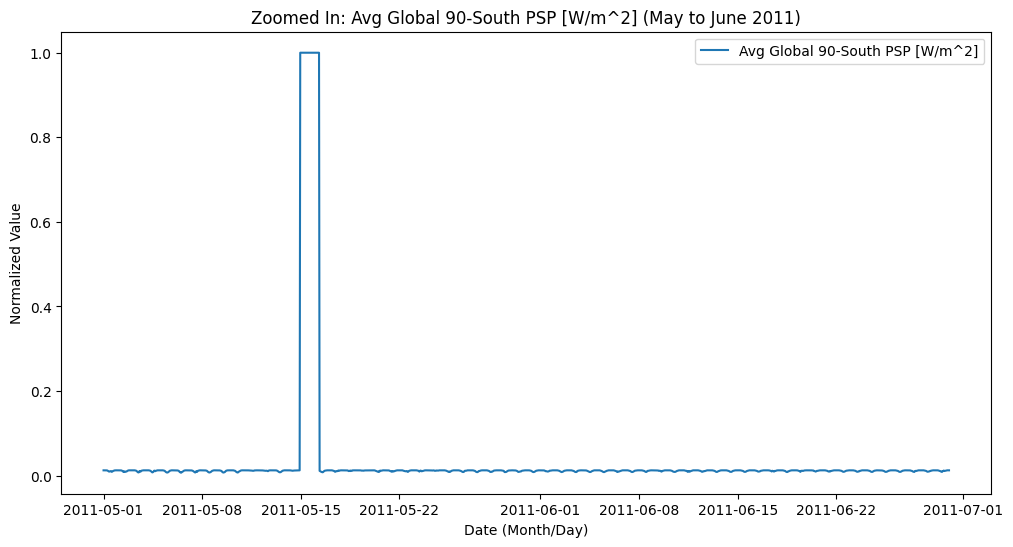

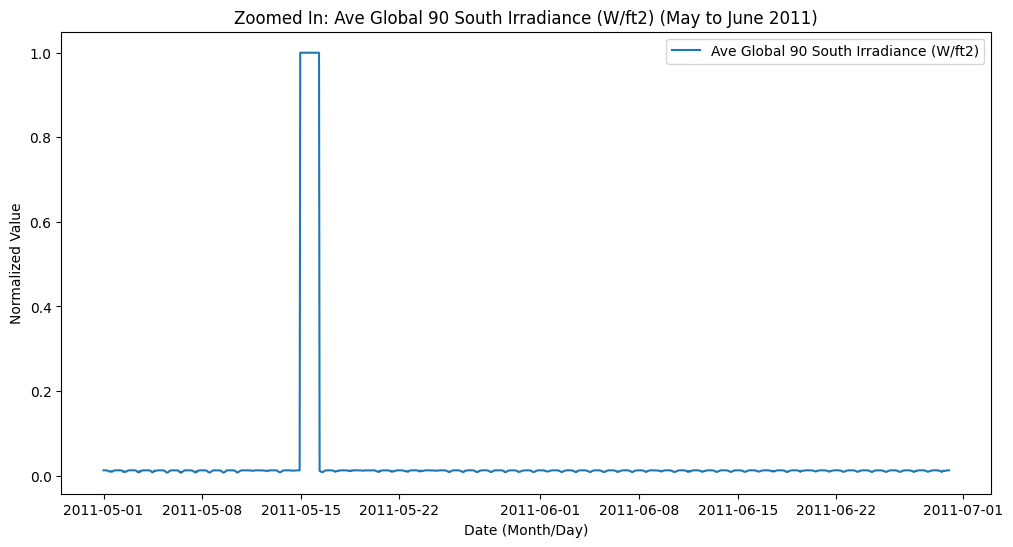

In [3]:
# ------------------------------
# Zoomed In Plot for Specific Weather Data
# ------------------------------
# Define the date range for zooming in.
zoom_start = pd.to_datetime("2011-05-01")
zoom_end = pd.to_datetime("2011-06-30")

# Filter the normalized weather DataFrame for the desired date range.
zoom_df = numeric_weather_df_norm.loc[zoom_start:zoom_end]

# Define the columns to zoom in on.
zoom_columns = ["Avg Global 90-South PSP [W/m^2]", "Ave Global 90 South Irradiance (W/ft2)"]

# Plot each specified column in its own figure.
for col in zoom_columns:
    if col in zoom_df.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(zoom_df.index, zoom_df[col], label=col)
        plt.xlabel("Date (Month/Day)")
        plt.ylabel("Normalized Value")
        plt.title(f"Zoomed In: {col} (May to June 2011)")
        plt.legend()
        plt.show()


## Pre-processed data

/tmp/ipykernel_1345236/4121579675.py:31: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  weather_df = pd.read_csv(


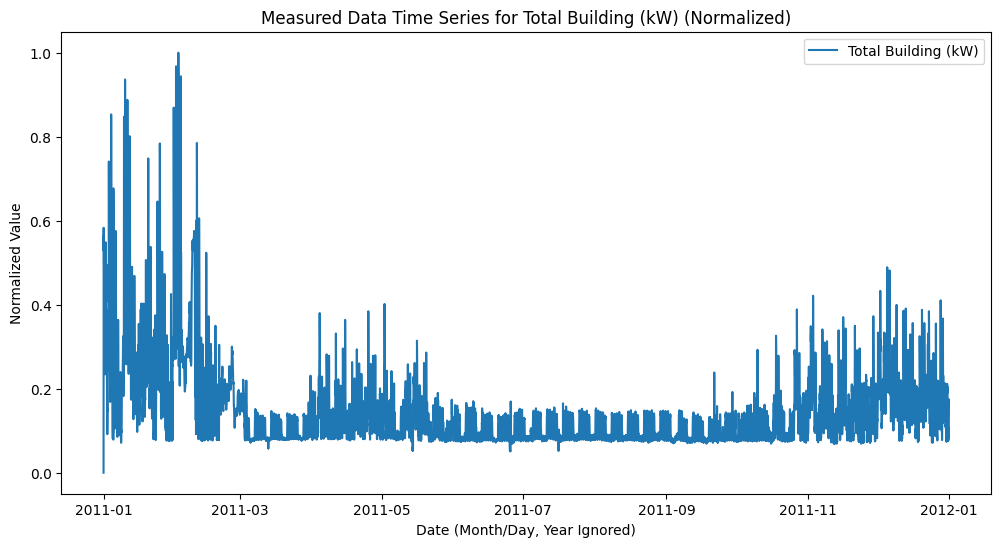

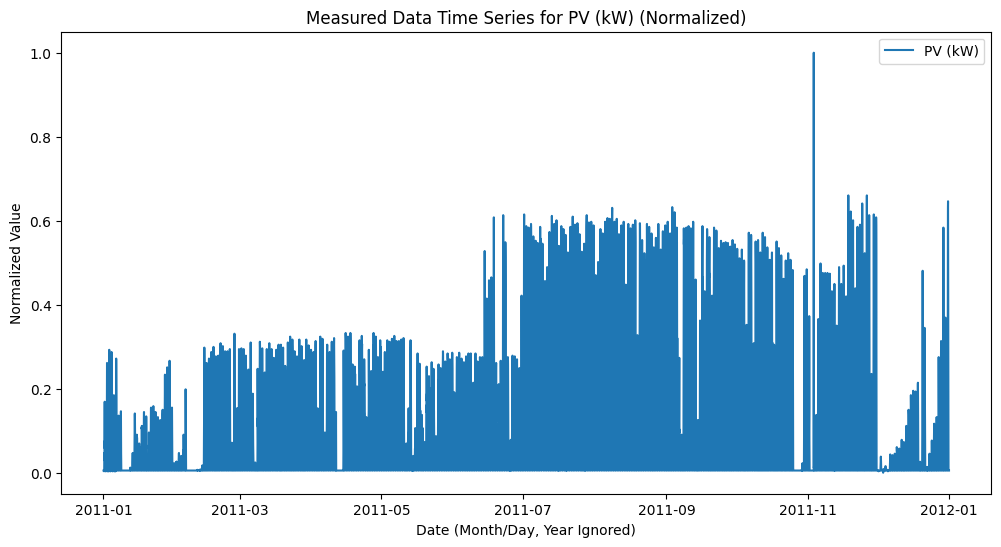

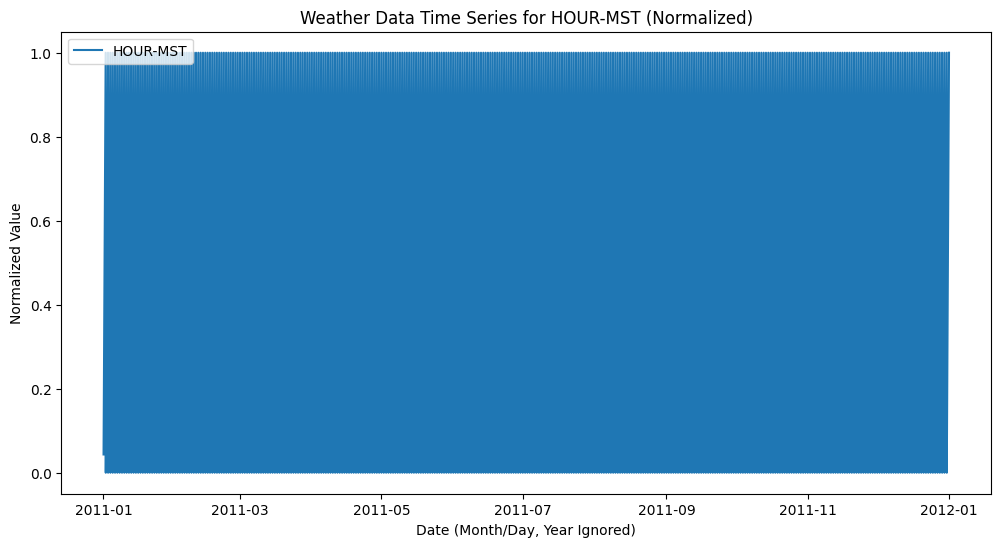

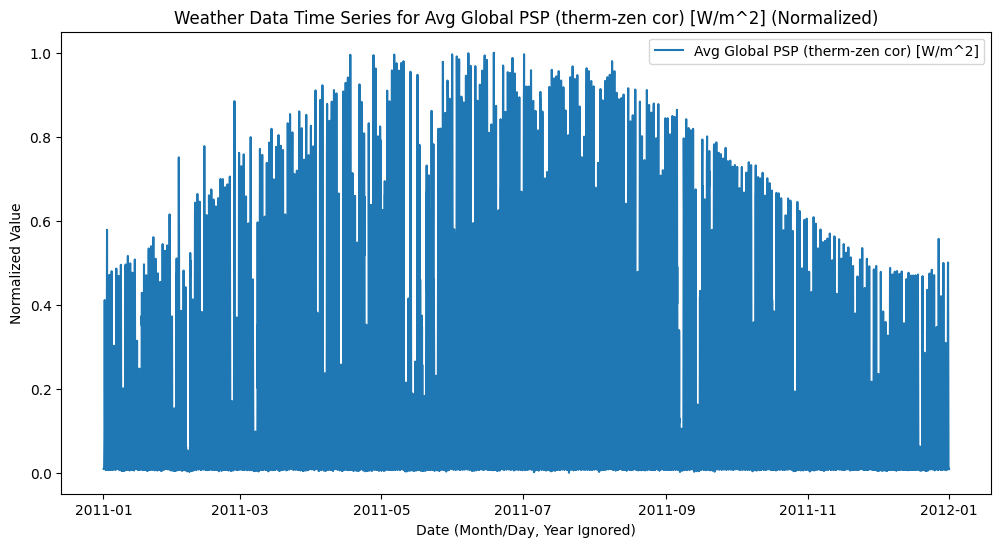

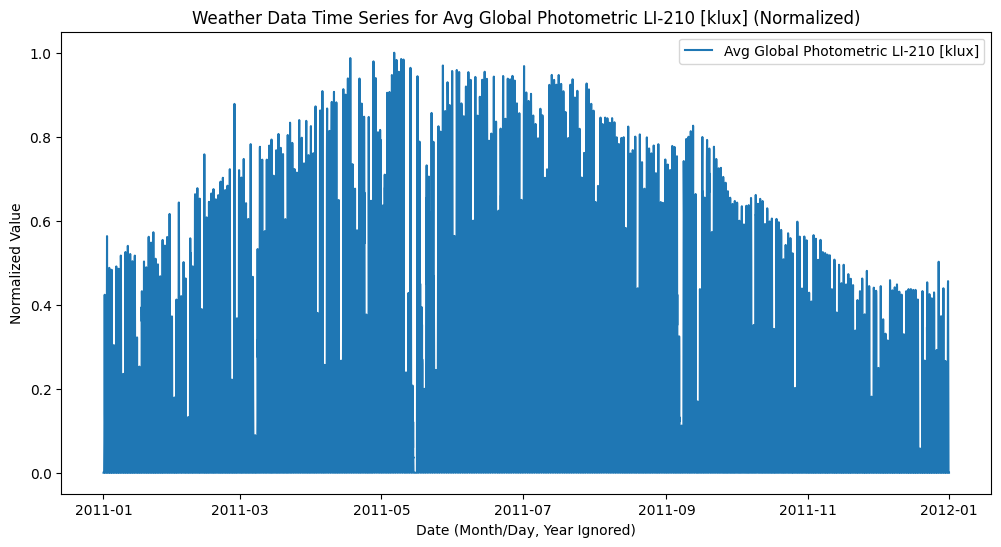

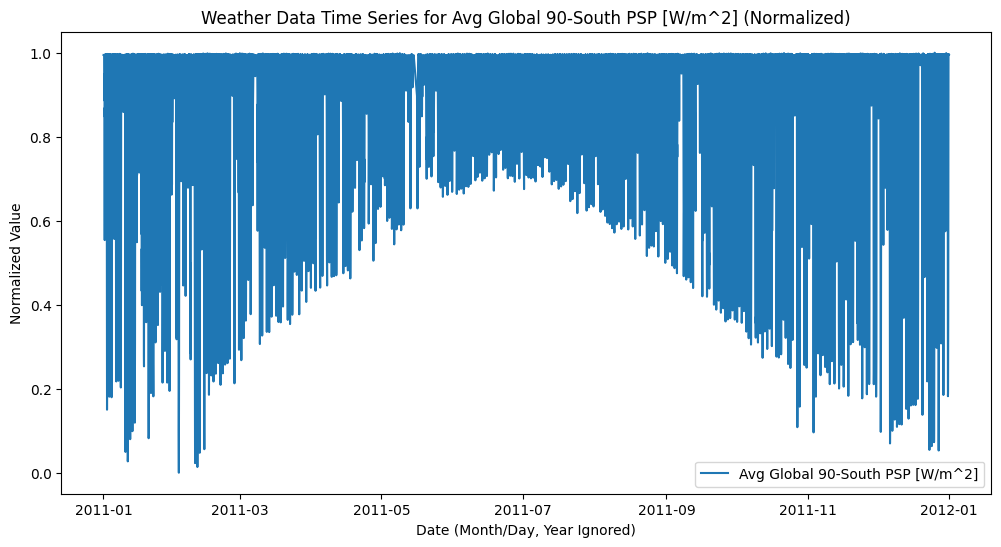

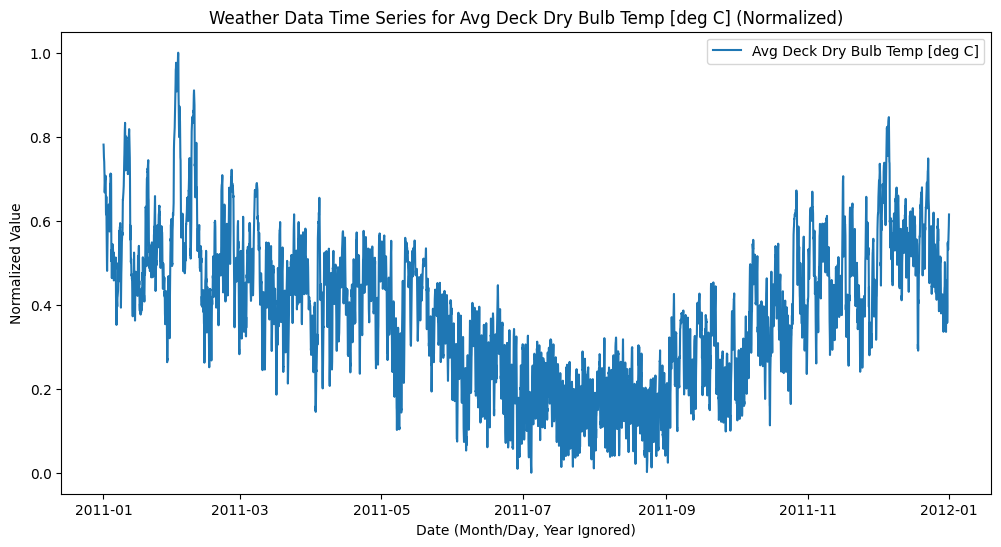

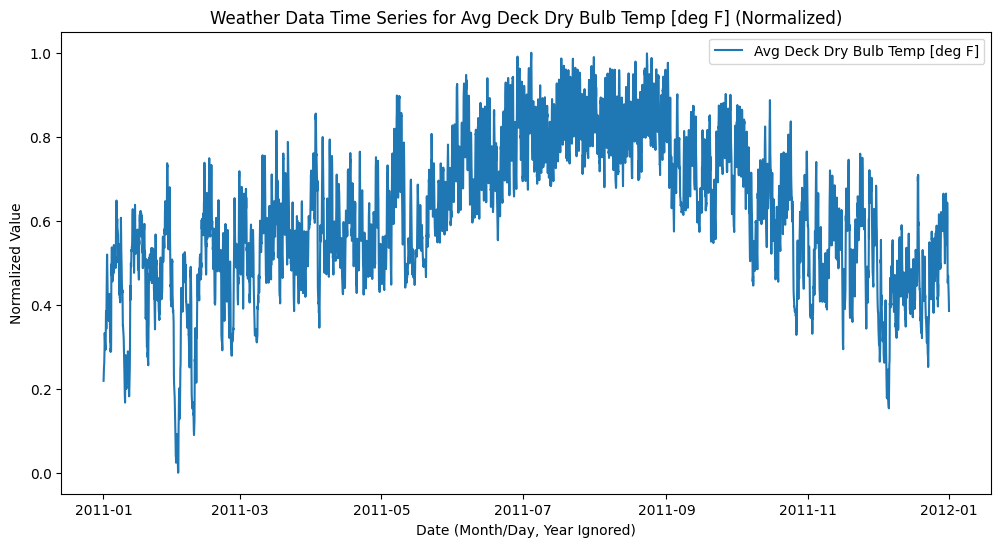

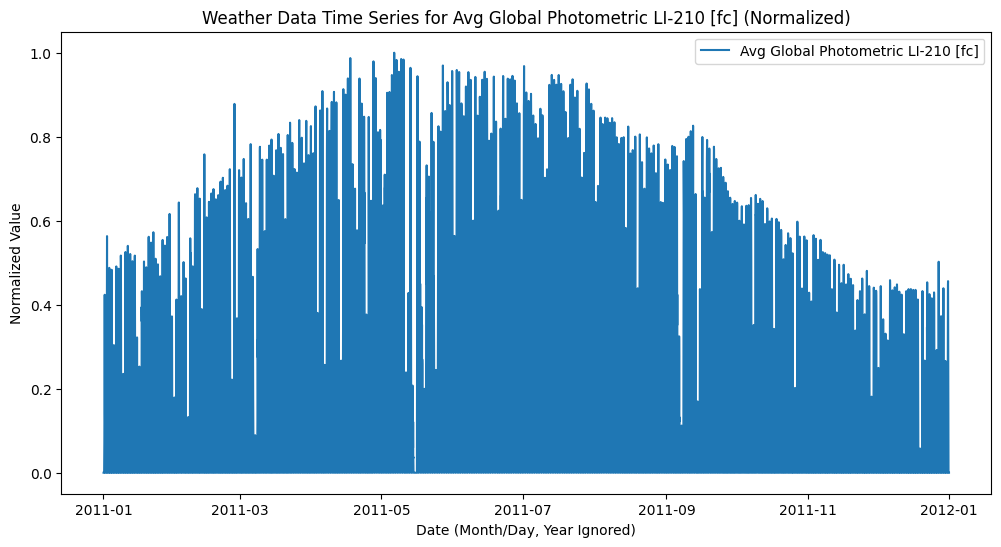

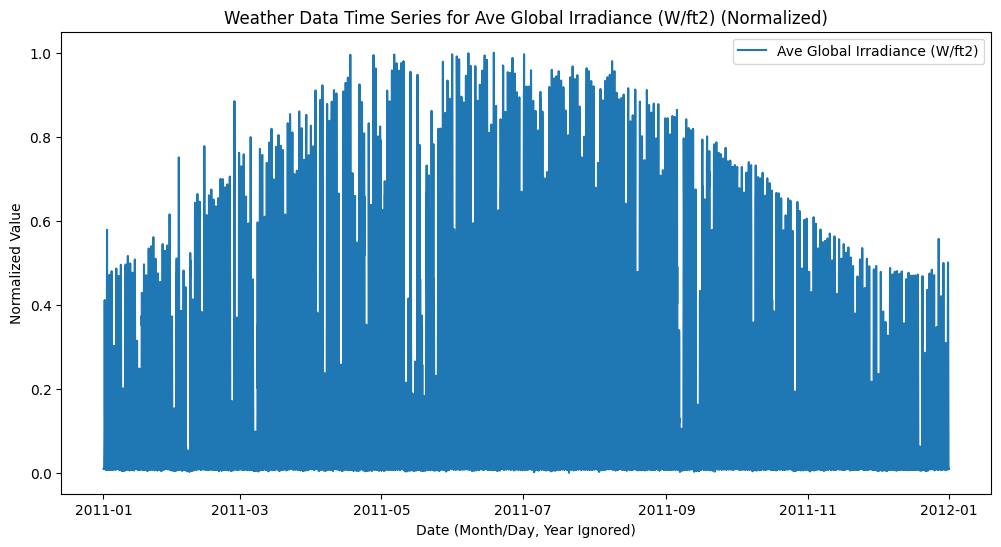

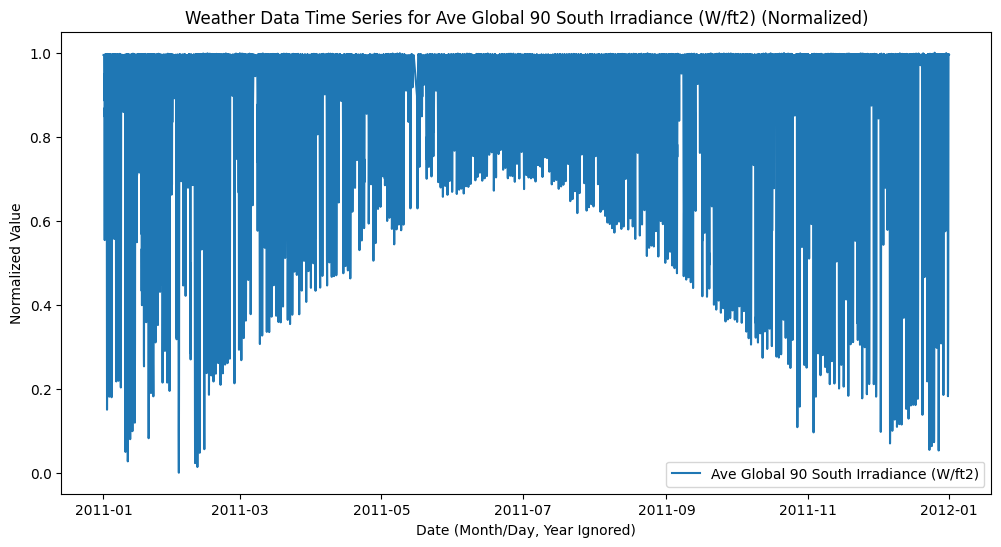

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def parse_measured_date(date_str):
    """
    Try to parse a date string using two possible formats.
    Returns NaT if neither format works.
    """
    for fmt in ("%m/%d/%Y %H:%M", "%m/%d/%y %H:%M"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except Exception:
            continue
    return pd.NaT

# ------------------------------
# Process Measured Data
# ------------------------------
measured_df = pd.read_csv("rsfmeasureddata2011.csv")
# Parse dates
measured_df["Date and Time"] = measured_df["Date and Time"].apply(parse_measured_date)
measured_df = measured_df.dropna(subset=["Date and Time"])
# Replace year with 2011 (to ignore year differences)
measured_df["Date and Time"] = measured_df["Date and Time"].apply(lambda dt: dt.replace(year=2011))
measured_df.set_index("Date and Time", inplace=True)

# ------------------------------
# Process Weather Data
# ------------------------------
weather_df = pd.read_csv(
    "rsfweatherdata2011.csv",
    parse_dates=["DATE AND TIME"],
    date_parser=lambda x: pd.to_datetime(x, format="%m/%d/%y %H:%M", errors='coerce')
)
weather_df = weather_df.dropna(subset=["DATE AND TIME"])
weather_df["DATE AND TIME"] = weather_df["DATE AND TIME"].apply(lambda dt: dt.replace(year=2011))
weather_df.set_index("DATE AND TIME", inplace=True)

# ------------------------------
# Normalization and Sensor Error Correction for Measured Data
# ------------------------------
# Work on a copy for measured data normalization.
measured_df_norm = measured_df.copy()

# Flip sign for "PV (kW)" because values are negative.
if "PV (kW)" in measured_df_norm.columns:
    measured_df_norm["PV (kW)"] = -measured_df_norm["PV (kW)"]

# Select columns to normalize
measured_cols = ["Total Building (kW)", "PV (kW)"]
measured_df_norm[measured_cols] = (measured_df_norm[measured_cols] - measured_df_norm[measured_cols].min()) / \
                                  (measured_df_norm[measured_cols].max() - measured_df_norm[measured_cols].min())

# ------------------------------
# Normalization and Sensor Error Correction for Weather Data
# ------------------------------
# Convert weather data columns to numeric and drop entirely non-numeric ones.
numeric_weather_df = weather_df.apply(pd.to_numeric, errors='coerce')
numeric_weather_df = numeric_weather_df.dropna(axis=1, how='all')

# Flip sign for selected weather columns.
# Here we flip three columns as per previous instruction.
cols_to_flip = [
    "Avg Global 90-South PSP [W/m^2]",
    "Avg Deck Dry Bulb Temp [deg C]",
    "Ave Global 90 South Irradiance (W/ft2)"
]
for col in cols_to_flip:
    if col in numeric_weather_df.columns:
        numeric_weather_df[col] = -numeric_weather_df[col]

# --- Sensor Error Correction (Option 1: Time-based interpolation) ---
# Define the error period.
error_start = pd.to_datetime("2011-05-14 23:00")
error_end = pd.to_datetime("2011-05-16 07:00")
error_mask = (numeric_weather_df.index >= error_start) & (numeric_weather_df.index <= error_end)

# Specify the columns with sensor errors (only for the two irradiance/PSP columns).
cols_error = ["Avg Global 90-South PSP [W/m^2]", "Ave Global 90 South Irradiance (W/ft2)"]
# Set the error period values to NaN.
numeric_weather_df.loc[error_mask, cols_error] = np.nan

# Apply time-based interpolation (based on the datetime index) to these columns.
numeric_weather_df[cols_error] = numeric_weather_df[cols_error].interpolate(method='time')

# Now normalize all numeric weather columns.
numeric_weather_df_norm = (numeric_weather_df - numeric_weather_df.min()) / (numeric_weather_df.max() - numeric_weather_df.min())

# ------------------------------
# Plotting the Full Measured Data
# ------------------------------
for col in measured_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(measured_df_norm.index, measured_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Measured Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()

# ------------------------------
# Plotting the Full Weather Data
# ------------------------------
for col in numeric_weather_df_norm.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(numeric_weather_df_norm.index, numeric_weather_df_norm[col], label=col)
    plt.xlabel("Date (Month/Day, Year Ignored)")
    plt.ylabel("Normalized Value")
    plt.title(f"Weather Data Time Series for {col} (Normalized)")
    plt.legend()
    plt.show()


## Compare correlation

               Measured                                 Weather  Euclidean  \
0   Total Building (kW)                                HOUR-MST  44.904457   
1   Total Building (kW)  Avg Global PSP (therm-zen cor) [W/m^2]  27.003493   
2   Total Building (kW)    Avg Global Photometric LI-210 [klux]  26.155476   
3   Total Building (kW)         Avg Global 90-South PSP [W/m^2]  70.876145   
4   Total Building (kW)          Avg Deck Dry Bulb Temp [deg C]  25.932299   
5   Total Building (kW)          Avg Deck Dry Bulb Temp [deg F]  49.597276   
6   Total Building (kW)      Avg Global Photometric LI-210 [fc]  26.155476   
7   Total Building (kW)           Ave Global Irradiance (W/ft2)  27.003493   
8   Total Building (kW)  Ave Global 90 South Irradiance (W/ft2)  70.876145   
9               PV (kW)                                HOUR-MST  48.193771   
10              PV (kW)  Avg Global PSP (therm-zen cor) [W/m^2]  17.683361   
11              PV (kW)    Avg Global Photometric LI-210 [klux] 

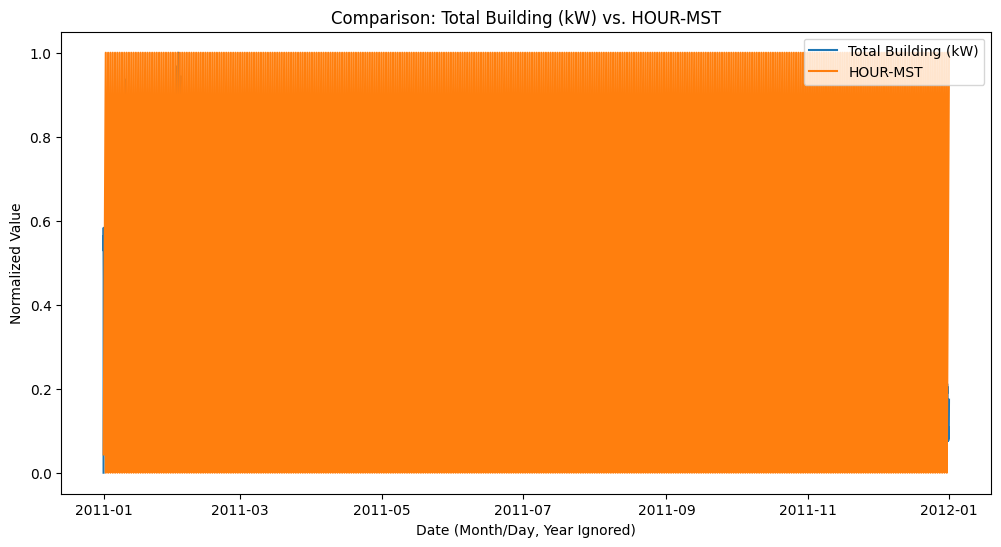

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.fft import fft

# ------------------------------
# Define Helper Functions for Metrics
# ------------------------------

def align_series(ts1, ts2):
    """Align two pandas Series on their common datetime index."""
    common_index = ts1.index.intersection(ts2.index)
    return ts1.loc[common_index], ts2.loc[common_index]

def euclidean_distance(ts1, ts2):
    """Compute direct Euclidean distance between two time series."""
    s1, s2 = align_series(ts1, ts2)
    if len(s1) == 0:
        return np.nan
    return np.linalg.norm(s1.values - s2.values)

def fft_euclidean_distance(ts1, ts2):
    """Compute Euclidean distance between FFT magnitudes of two time series."""
    s1, s2 = align_series(ts1, ts2)
    if len(s1) == 0:
        return np.nan
    # Compute FFT for each series
    fft1 = fft(s1.values)
    fft2 = fft(s2.values)
    # Compare the magnitudes (absolute values)
    return np.linalg.norm(np.abs(fft1) - np.abs(fft2))

def kl_divergence(p, q, eps=1e-10):
    """
    Compute the KL divergence from p to q.
    p and q should be numpy arrays that sum to 1.
    """
    p = p + eps
    q = q + eps
    return np.sum(p * np.log(p / q))

def symmetric_kl(ts1, ts2, eps=1e-10):
    """
    Compute a symmetric KL divergence between two time series.
    The series are converted to probability distributions by subtracting the minimum
    (to ensure non-negativity) and normalizing so the sum is 1.
    """
    s1, s2 = align_series(ts1, ts2)
    if len(s1) == 0:
        return np.nan
    # Shift series so that the minimum is zero (if needed)
    arr1 = s1.values - s1.values.min()
    arr2 = s2.values - s2.values.min()
    # Normalize to form probability distributions.
    p = arr1 / (arr1.sum() + eps)
    q = arr2 / (arr2.sum() + eps)
    return 0.5 * (kl_divergence(p, q, eps) + kl_divergence(q, p, eps))

def wavelet_energy_distance(ts1, ts2, wavelet='db1', level=None):
    """
    Compute the Euclidean distance between the normalized wavelet energy distributions
    of two time series.
    The energy at each level is computed as the sum of squares of the coefficients.
    """
    s1, s2 = align_series(ts1, ts2)
    if len(s1) == 0:
        return np.nan
    # Compute the discrete wavelet transform decomposition.
    coeffs1 = pywt.wavedec(s1.values, wavelet, level=level)
    coeffs2 = pywt.wavedec(s2.values, wavelet, level=level)
    # Compute energy for each set of coefficients.
    energy1 = np.array([np.sum(c**2) for c in coeffs1])
    energy2 = np.array([np.sum(c**2) for c in coeffs2])
    # Normalize energy vectors so they sum to 1.
    energy1 = energy1 / energy1.sum()
    energy2 = energy2 / energy2.sum()
    return np.linalg.norm(energy1 - energy2)

# Specify the measured columns and weather columns you want to compare.
measured_cols = ["Total Building (kW)", "PV (kW)"]
# For weather, you can compare all columns or a subset. Here we use all numeric columns.
weather_cols = numeric_weather_df_norm.columns

# ------------------------------
# Compute the Metrics for Each Pair
# ------------------------------
results = []
for mcol in measured_cols:
    for wcol in weather_cols:
        ts_measured = measured_df_norm[mcol]
        ts_weather = numeric_weather_df_norm[wcol]
        
        ed = euclidean_distance(ts_measured, ts_weather)
        fft_ed = fft_euclidean_distance(ts_measured, ts_weather)
        kl_div = symmetric_kl(ts_measured, ts_weather)
        wavelet_ed = wavelet_energy_distance(ts_measured, ts_weather, wavelet='db1')  # using default wavelet
        
        results.append({
            "Measured": mcol,
            "Weather": wcol,
            "Euclidean": ed,
            "FFT Euclidean": fft_ed,
            "KL Divergence": kl_div,
            "Wavelet Energy Distance": wavelet_ed
        })

# Convert results to a DataFrame for a nice display.
results_df = pd.DataFrame(results)
print(results_df)

# ------------------------------
# Optionally: Plot the two series for visual inspection.
# For example, plot "Total Building (kW)" vs. a selected weather variable.
# ------------------------------
example_measured = measured_cols[0]  # "Total Building (kW)"
example_weather = weather_cols[0]      # first weather column

plt.figure(figsize=(12,6))
plt.plot(measured_df_norm.index, measured_df_norm[example_measured], label=example_measured)
plt.plot(numeric_weather_df_norm.index, numeric_weather_df_norm[example_weather], label=example_weather)
plt.xlabel("Date (Month/Day, Year Ignored)")
plt.ylabel("Normalized Value")
plt.title(f"Comparison: {example_measured} vs. {example_weather}")
plt.legend()
plt.show()


## Decide which two data are highly correlated

In [6]:
# Define the list of metrics we computed
metrics = ["Euclidean", "FFT Euclidean", "KL Divergence", "Wavelet Energy Distance"]

# For each measured column, find the weather variable that minimizes each metric
for measured in results_df["Measured"].unique():
    print(f"\nFor measured series: {measured}")
    subset = results_df[results_df["Measured"] == measured]
    for metric in metrics:
        # Find the row with the minimum value for the current metric
        best_row = subset.loc[subset[metric].idxmin()]
        best_weather = best_row["Weather"]
        best_value = best_row[metric]
        print(f"  {metric}: Best match is '{best_weather}' with a distance of {best_value:.4f}")



For measured series: Total Building (kW)
  Euclidean: Best match is 'Avg Deck Dry Bulb Temp [deg C]' with a distance of 25.9323
  FFT Euclidean: Best match is 'Avg Global Photometric LI-210 [klux]' with a distance of 1921.4199
  KL Divergence: Best match is 'Avg Deck Dry Bulb Temp [deg C]' with a distance of 0.2412
  Wavelet Energy Distance: Best match is 'HOUR-MST' with a distance of 0.0784

For measured series: PV (kW)
  Euclidean: Best match is 'Avg Global Photometric LI-210 [klux]' with a distance of 16.9706
  FFT Euclidean: Best match is 'Avg Global Photometric LI-210 [klux]' with a distance of 1291.7902
  KL Divergence: Best match is 'Avg Global PSP (therm-zen cor) [W/m^2]' with a distance of 0.2565
  Wavelet Energy Distance: Best match is 'Avg Global Photometric LI-210 [fc]' with a distance of 0.0438


## Here we might able to say Total Building is most correlated to Avg Deck Dry Bulb Temp [deg C] in weather data;
## While PV is most correlated to Avg Global Photometric LI-210 [klux] in weather data.

In [ ]:
x1_train: 60 previous energy
x2_train: 60 previous dry bulb
x3_train: 60 another correlated data
x4_train: 60 time stemp 



y_train: single output energy